#Headers

In [0]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Read Data Files

In [0]:
# csvfile = open("./stat.csv",'r') # data without 64
csvfile = open("./stat_with_64.csv",'r') # data with 64
reader = csv.reader(csvfile, delimiter=',', quotechar='|')

decimal = []
yijinecimal = []
next(reader, None)  # skip the headers

for row in reader:
  decimal.append(int(row[2]))
  yijinecimal.append(int(row[3]))

# Visualize Raw Data

## Linear Regression

intercept: 21882.73091260477
slope: 0.19243517438803978


Text(0.5, 1.0, '$R^2=$0.6804846087241271')

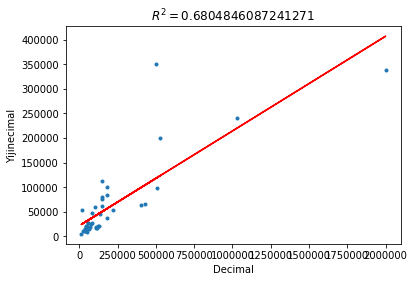

In [3]:
# apply linear regression
model = LinearRegression()
decimal_ = np.array(decimal).reshape((-1, 1))
model.fit(decimal_, yijinecimal)

r_sq = model.score(decimal_, yijinecimal)

yijinecimal_pred = model.predict(decimal_)

print('intercept:', model.intercept_)
print('slope:', model.coef_[0])

# plt figure
fig = plt.figure()
plt.plot(decimal, yijinecimal, '.')
plt.plot(decimal, yijinecimal_pred, 'r-')
plt.xlabel("Decimal")
plt.ylabel("Yijinecimal")
plt.title("$R^2=$"+str(r_sq))

## Logarithmic Representation

intercept: 1.598479689715953
slope: 0.7695418700090009


Text(0.5, 1.0, '$R^2=$0.7077964172985818')

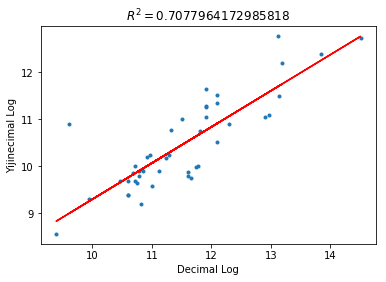

In [4]:
decimal_log = np.log(decimal)
yijinecimal_log = np.log(yijinecimal)

# apply linear on log data
model_log = LinearRegression()
decimal_log_ = np.array(decimal_log).reshape((-1, 1))
model_log.fit(decimal_log_, yijinecimal_log)

r_sq = model_log.score(decimal_log_, yijinecimal_log)

yijinecimal_log_pred = model_log.predict(decimal_log_)
print('intercept:', model_log.intercept_)
print('slope:', model_log.coef_[0])

# plt figure
fig = plt.figure()
plt.plot(decimal_log, yijinecimal_log, '.')
plt.plot(decimal_log, yijinecimal_log_pred, 'r-')
plt.xlabel("Decimal Log")
plt.ylabel("Yijinecimal Log")
plt.title("$R^2=$"+str(r_sq))

## MLP Regression

[11.92175303 11.97531083  9.00797277  9.94175489 10.08795901  9.74846213
 10.19019191  9.8413845  11.15875568 11.71665092 11.78312436 11.93995459
  9.76781335 10.53004443  9.97291546  9.80533483  8.49360262 10.68359198
 12.58602733 13.19596422 10.81512294 10.4424402  10.23733808  9.60023272
  9.60023272  9.47749751  9.70849285  9.60023272 10.26003426  9.70849285
  9.68783695  9.89293907  9.76781335 10.81512294 10.81512294 10.81512294
 10.98270357  8.69870474 10.98270357 10.71828096 10.64754231 10.53004443
 10.57090221 10.98270357]


Text(0.5, 1.0, '$R^2=$0.6808084309377576')

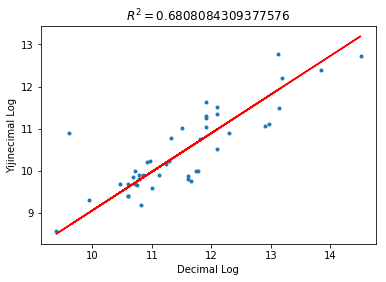

In [5]:
model_mlp = MLPRegressor(hidden_layer_sizes=(10,10,10),solver="sgd", max_iter=99999999)
model_mlp.fit(decimal_log_, yijinecimal_log)
yijinecimal_mlp_pred = model_mlp.predict(decimal_log_)
r_sq = model_mlp.score(decimal_log_, yijinecimal_log)
print(yijinecimal_mlp_pred)
# plt figure
fig = plt.figure()
plt.plot(decimal_log, yijinecimal_log, '.')
plt.plot(decimal_log, yijinecimal_mlp_pred, 'r-')
plt.xlabel("Decimal Log")
plt.ylabel("Yijinecimal Log")
plt.title("$R^2=$"+str(r_sq))